In [1]:
import pandas as pd

In [2]:
cleaned_data = pd.read_csv("dataset/cleaned_data_50000.csv")

In [3]:
cleaned_data.head(5)

,reviewerID,asin,reviewText,clean_reviewText,summary,clean_summary,rating,helpful_rev,not_helpful_rev,helpful_rev_ratio,rev_year,rev_month,reviewTime,rating_class
0,A1B3AQFXOWGRR0,B000053HBB,I say this lens is fantastically specific beca...,say lens fantastically specific useful handful...,Fantastically Specific!,fantastically specific,5.0,5,0,1.0,2013,9,2013-09-03,good
1,A23LM7S0TPQSCZ,B00001P4ZH,Koss PortaPro is light and sounds very good bu...,koss portapro light sound good not spetacular ...,Koss PortaPro sounds very good and a great value,koss portapro sound good great value,4.0,0,0,0.0,2014,6,2014-06-20,good
2,A1VRG6CDWE7VJT,B0000511X0,This item has a lot going for it and it's buil...,item lot go build last connect sound system co...,Excellent Product,excellent product,5.0,1,0,1.0,2012,7,2012-07-06,good
3,A1E8XGHM6Z4W93,B00001W0DC,These headphones are great at this price! I al...,headphones great price already previous model ...,Great headphones for a reasonable price!,great headphones reasonable price,5.0,1,0,1.0,2007,11,2007-11-03,good
4,AQARJG1HXA3CL,B00022OBO2,Mediocre sound with too much high frequency re...,mediocre sound much high frequency response im...,Mediocre,mediocre,2.0,0,0,0.0,2014,1,2014-01-22,bad


In [4]:
cleaned_electronics_data = cleaned_data.drop(["asin","summary","rating","helpful_rev","not_helpful_rev","helpful_rev_ratio","rev_year","rev_month","reviewTime"], axis = 1)

In [5]:
cleaned_electronics_data.head(5)

,reviewerID,reviewText,clean_reviewText,clean_summary,rating_class
0,A1B3AQFXOWGRR0,I say this lens is fantastically specific beca...,say lens fantastically specific useful handful...,fantastically specific,good
1,A23LM7S0TPQSCZ,Koss PortaPro is light and sounds very good bu...,koss portapro light sound good not spetacular ...,koss portapro sound good great value,good
2,A1VRG6CDWE7VJT,This item has a lot going for it and it's buil...,item lot go build last connect sound system co...,excellent product,good
3,A1E8XGHM6Z4W93,These headphones are great at this price! I al...,headphones great price already previous model ...,great headphones reasonable price,good
4,AQARJG1HXA3CL,Mediocre sound with too much high frequency re...,mediocre sound much high frequency response im...,mediocre,bad


In [6]:
#! pip install wordcloud

In [7]:
from wordcloud import WordCloud
df = cleaned_electronics_data.groupby("rating_class")

In [8]:
good_rev = df.get_group("good")["clean_reviewText"]
bad_rev = df.get_group("bad")["clean_reviewText"]

In [9]:
good_rev.describe()

count          24988
unique         24968
top       work great
freq               4
Name: clean_reviewText, dtype: object

In [10]:
bad_rev.describe()

count                                                 19302
unique                                                19292
top       purchase four sd two sd units experience packe...
freq                                                      2
Name: clean_reviewText, dtype: object

In [11]:
good_rev_s = df.get_group("good")["clean_reviewText"].to_string()
bad_rev_s = df.get_group("bad")["clean_reviewText"].to_string()

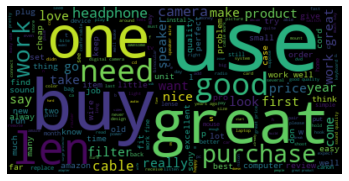

In [12]:
import matplotlib.pyplot as plt

wordcloud = WordCloud().generate(good_rev_s)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

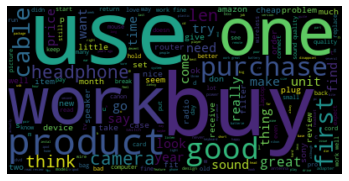

In [13]:
wordcloud = WordCloud().generate(bad_rev_s)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [14]:
from nltk.util import ngrams
import collections

In [15]:
good_rev_text = good_rev_s.split()
g_trigrams = ngrams(good_rev_text, 2)
g_trigram_frq = collections.Counter(g_trigrams)
g_trigram_frq.most_common(5)

[(('work', 'great'), 607),
 (('work', 'well'), 368),
 (('work', 'fine'), 214),
 (('years', 'ago'), 194),
 (('good', 'quality'), 190)]

In [16]:
bad_rev_text = bad_rev_s.split()
b_trigrams = ngrams(bad_rev_text, 2)
b_trigram_frq = collections.Counter(b_trigrams)
b_trigram_frq.most_common(5)

[(('work', 'well'), 234),
 (('work', 'fine'), 230),
 (('not', 'work'), 225),
 (('sound', 'quality'), 189),
 (('work', 'great'), 160)]

In [17]:
cleaned_electronics_data["clean_reviewText"] = cleaned_electronics_data["clean_reviewText"].astype("str")

In [18]:
cleaned_electronics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44308 entries, 0 to 44307
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   reviewerID        44308 non-null  object
 1   reviewText        44291 non-null  object
 2   clean_reviewText  44308 non-null  object
 3   clean_summary     44199 non-null  object
 4   rating_class      44308 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


## Word Frequency

In [19]:
feq = pd.Series(" ".join(cleaned_electronics_data["clean_reviewText"]).split())

In [20]:
feq.value_counts()[0:20]

not        38711
.          35690
use        34612
get        25793
work       24523
one        20653
buy        18762
good       16910
sound      14904
like       14884
lens       14773
would      14505
great      14465
no         13762
make       12828
camera     12496
go         12124
time       11575
quality    11355
need       11068
dtype: int64

In [21]:
good_rev = good_rev.astype("str")
feq_good_rev = pd.Series(" ".join(good_rev).split()).value_counts()
#least_feq_good_rev = pd.Series(" ".join(good_rev).split()).value_counts()[::-1][:20]
#least_feq_good_rev
feq_good_rev[0:12]

use      19984
.        19522
not      16399
get      12605
work     11451
one      10887
great    10756
lens     10360
good      9920
buy       9409
sound     8483
like      8236
dtype: int64

In [22]:
bad_rev = bad_rev.astype("str")
feq_bad_rev = pd.Series(" ".join(bad_rev).split()).value_counts()
#least_feq_bad_rev = pd.Series(" ".join(bad_rev).split()).value_counts()[::-1][:20]
#least_feq_bad_rev
feq_bad_rev[0:12]

not      22312
.        16168
use      14628
get      13188
work     13072
one       9766
buy       9353
would     7979
no        7044
good      6990
like      6648
sound     6421
dtype: int64

In [23]:
#find common words in good rev and bad rev and their fequency
good_words = list(" ".join(good_rev).split())
bad_words = list(" ".join(bad_rev).split())
common_words = list(set(good_words)&set(bad_words))
type(common_words)
freq_good_common = list(feq_good_rev[common_words])
freq_bad_common = list(feq_bad_rev[common_words])

In [24]:
data = {"common_words": common_words, "good_rev" : freq_good_common, "bad_rev" : freq_bad_common}
df = pd.DataFrame(data)
df.sort_values(by=["good_rev", "bad_rev" ], inplace=True, ascending=False)
df.head(20)
df2 = df[(df.good_rev > 8000) & (df.bad_rev > 8000)]
most_freq_common_words = list(df2["common_words"])

In [25]:
df.head(20)

,common_words,good_rev,bad_rev
19067,use,19984,14628
18787,.,19522,16168
6958,not,16399,22312
3052,get,12605,13188
16877,work,11451,13072
7412,one,10887,9766
12697,great,10756,3709
2456,lens,10360,4413
3101,good,9920,6990
18660,buy,9409,9353


In [26]:
most_freq_common_words.remove("not")

In [29]:
#most_freq_common_words.remove("no")

In [30]:
most_freq_common_words

['use', '.', 'get', 'work', 'one', 'buy']

In [31]:
df3 = df[(df.good_rev == 1) & (df.bad_rev == 1)]
least_freq_common_words = list(df3["common_words"])

In [32]:
len(least_freq_common_words)

3289

In [33]:
remove_words  = most_freq_common_words + least_freq_common_words

In [34]:
cleaned_electronics_data["clean_reviewText"] = cleaned_electronics_data["clean_reviewText"].apply(lambda x: " ".join(x for x in x.split() if x not in remove_words))

In [ ]:
#cleaned_electronics_data.to_csv("dataset/cleaned_data.csv", sep=',', encoding='utf-8', index = False)

## Spelling Correction

In [ ]:
#! pip install textblob

In [ ]:
# from textblob import TextBlob
# cleaned_electronics_data["clean_reviewText"] = cleaned_electronics_data["clean_reviewText"].apply(lambda x: str(TextBlob(str(x)).correct()))

In [35]:
cleaned_electronics_data.to_csv("dataset/cleaned_data_3.csv", sep=',', encoding='utf-8', index = False)